11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0977 - val_loss: 0.0316
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0283 - val_loss: 0.0200
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0190 - val_loss: 0.0146
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0141 - val_loss: 0.0113
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0110 - val_loss: 0.0091
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0090 - val_loss: 0.0076
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0055 - val_loss: 0.0051
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

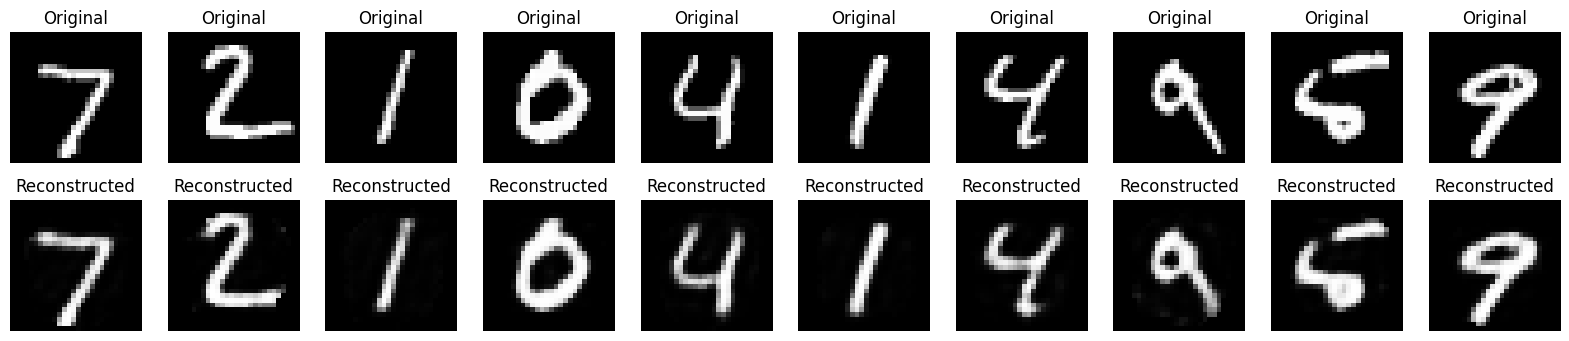

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to (batch_size, 784) because we use fully connected layers (flatten the 28x28 images)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the Autoencoder model
input_dim = 28 * 28  # Flattened image size (28x28)
encoding_dim = 64  # Dimensionality of the encoding (bottleneck layer)

# Encoder
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

# Get the encoder part (for visualization purposes)
encoder = models.Model(input_img, encoded)

# Encode some test images
encoded_imgs = encoder.predict(x_test)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    ax.axis('off')

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstructed")
    ax.axis('off')

plt.show()
